In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import copy
from pathlib import Path 

In [2]:
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# Imported the module
from Model_CAR_NK import Model_obj_CAR_NK as obj_CAR_NK
from Model_Wt_NK import Model_obj_WT_NK as obj_WT_NK
from fitting import Model_fit, Model_Pred, Model_bw_pred
from imp_exp_data import cytof_data
from plotting import plot,R2_plot

In [4]:
Sys_CAR = obj_CAR_NK()
Sys_WT_NK = obj_WT_NK()

In [5]:
indx_mean_std = {'mean':18, 'std':27}
#data for Kasumi1 with WT, 50%, 75%, and 100%
mean_Kasumi1,ET_ratio  = cytof_data(row_index=indx_mean_std['mean'],sheet_name=0)
std_Kasumi1,_  = cytof_data(row_index=indx_mean_std['std'],sheet_name=0)
ET_ratio_num = np.array(ET_ratio)

In [6]:
LB = np.array([0.6,300,0.01,0.01,50,
               1.0e-2,
               1.0e-1,1.0e-2,
               1.0e-7])
UB = np.array([1.0,7000.0,0.6,0.6,2000,
               0.50e-0,
               1.0,1.0,
               1.5e-4])

In [7]:
param_100 = np.array([0.01, 1.3611247151766386, 2.646954531914279, 1.119928427439465, 0.8030447162325958])


In [8]:
opt = ['least_squares','minimize','pso']

In [9]:
def main_Kasumi1():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 30), (0, 70), (0, 20.0)]]
    Sys_CAR.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Kasumi1',limts=MFI_limt,frac=param_100[-1],param=param_100[:-1])
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT H', Tumor_cell='Kasumi1',limts=MFI_limt)
    x0 =[0.6, 1637.0, 0.6, 0.6, 1190.0, 0.07488, 0.1174, 0.01008, 5.911e-05]
    sys = (Sys_CAR,Sys_WT_NK)
    data = (mean_Kasumi1[-1],mean_Kasumi1[0],ET_ratio)
    return Model_fit(x0,LB,UB,sys,data,optimizer=opt[0],fit=False)
res0 = main_Kasumi1()

----- Optimized Parameters (2 sig. digits) -----
[0.6, 1637.0, 0.6, 0.6, 1190.0, 0.07488, 0.1174, 0.01008, 5.911e-05]
Cost = 62.7
Total Cost: 62.705748604701924


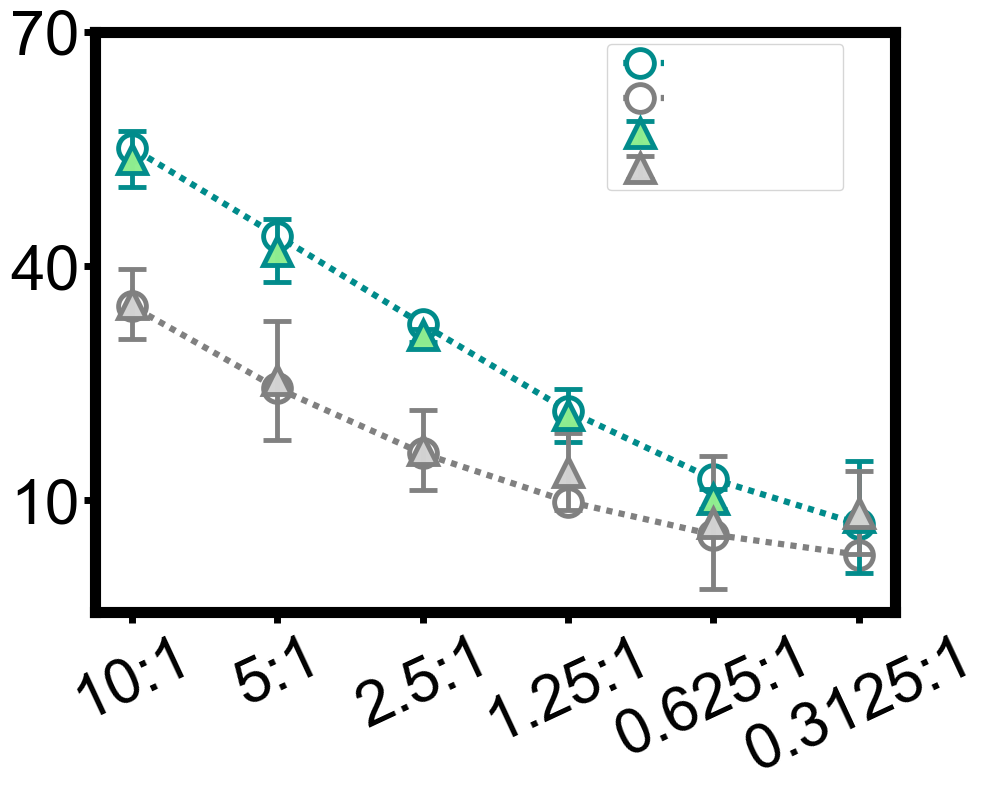

In [10]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
mean_data = (mean_Kasumi1[-1],mean_Kasumi1[0])
std_data = (std_Kasumi1[-1],std_Kasumi1[0])
plt.plot(ET_ratio_num, res0[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0],label="Fit-CAR-NK")
plt.plot(ET_ratio_num, res0[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0],label="Fit-WT")

plt.errorbar(ET_ratio_num, mean_data[0], yerr = std_data[0], 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99,label="data-CAR-NK")

plt.errorbar(ET_ratio_num, mean_data[1], yerr = std_data[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',alpha=0.99,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.tight_layout(pad=1.0)
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('Kasumi1_CAR_NK_fit.png')
plt.show()

### Prediction of 75 and 50 

In [11]:
Sys_CAR_75 = obj_CAR_NK()
Sys_CAR_50 = obj_CAR_NK()

In [12]:
param_50 = np.array([0.010000015483160304, 1.4999999119456204, 2.640778708909538, 1.12561370965004, 0.3946857283602171])
param_75 = np.array([0.01000007731723417, 1.4999998624504676, 2.6315469633474944, 1.1279565599747114, 0.55])

In [13]:
def main_Middle():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 30), (0, 70), (0, 20.0)]]
    Sys_CAR_75.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Kasumi1',limts=MFI_limt,frac=param_75[-1],param=param_75[:-1])
    Sys_CAR_50.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Kasumi1',limts=MFI_limt,frac=param_50[-1],param=param_50[:-1])
    y0 = copy.deepcopy(res0[2])
    sys = (Sys_CAR_75,Sys_CAR_50)
    data = (mean_Kasumi1[2],mean_Kasumi1[1],ET_ratio)
    return Model_bw_pred(y0,sys,data)
res_Mix_K = main_Middle()

Total Cost: 301.23800256511356


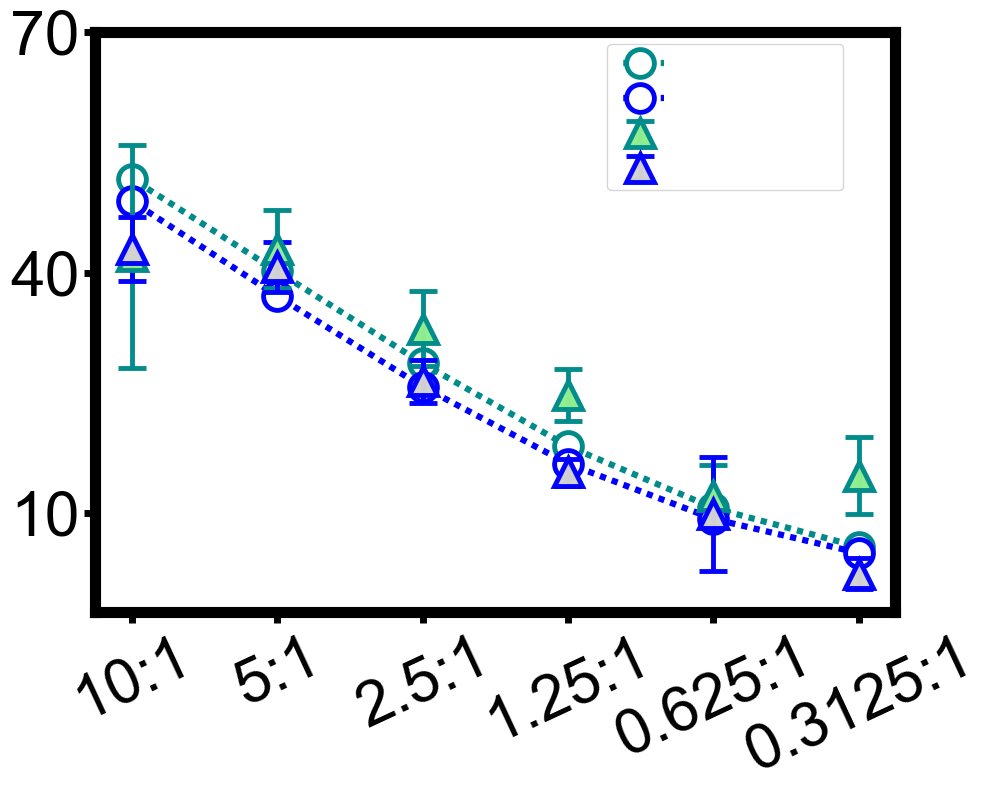

In [14]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
mean_data = (mean_Kasumi1[2],mean_Kasumi1[1])
std_data = (std_Kasumi1[2],std_Kasumi1[1])
plt.plot(ET_ratio_num, res_Mix_K[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0],label="Fit-CAR-NK")
plt.plot(ET_ratio_num, res_Mix_K[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0],label="Fit-WT")

plt.errorbar(ET_ratio_num, mean_data[0], yerr = std_data[0], 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99,label="data-CAR-NK")

plt.errorbar(ET_ratio_num, mean_data[1], yerr = std_data[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.tight_layout(pad=1.0)
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('Kasumi1_CAR_NK_75_50_Pred.png')
plt.show()

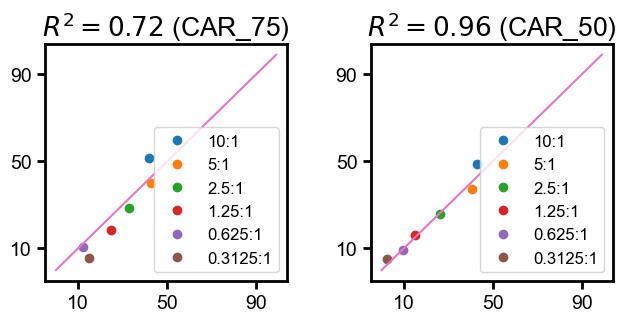

In [26]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'Arial'
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,4))
mean_data = (mean_Kasumi1[2],mean_Kasumi1[1])
for i in range(len(res_Mix_K[0])):
    ax1.plot(mean_data[0][i], res_Mix_K[0][i], 'o', label=f'{ET_ratio[i]}')
    ax2.plot(mean_data[1][i], res_Mix_K[1][i], 'o', label=f'{ET_ratio[i]}')

ax1.plot(np.arange(0,100),np.arange(0,100))
ax1.set_xticks([10,50,90])
ax1.set_yticks([10,50,90])
ax1.set_title(f'$R^2 = {r2_score(mean_data[0], res_Mix_K[0]):.2f}$ (CAR_75)',fontsize =19)
ax1.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax1.legend(prop = {'size':12})

ax2.plot(np.arange(0,100),np.arange(0,100))
#ax2.set_xlabel('Data')
#ax2.set_ylabel('Prediction',fontsize =25)
ax2.set_xticks([10,50,90])
ax2.set_yticks([10,50,90])
ax2.set_title(f'$R^2 = {r2_score(mean_data[1], res_Mix_K[1]):.2f}$ (CAR_50)',fontsize =19)
ax2.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax2.legend(prop = {'size':12})
#plt.xlabel('x')
plt.tight_layout(pad=1.0)
#plt.savefig('R2_CAR_75_50_Kasumi1.png')
plt.show()

# Prediction Mono by fitting WT

In [15]:
mean_Mono,ET_ratio  = cytof_data(row_index=indx_mean_std['mean'],sheet_name=1)
std_Mono,_  = cytof_data(row_index=indx_mean_std['std'],sheet_name=1)

In [16]:
LB = np.array([100,100,1.5e-7])
UB = np.array([20500,6500,1.0e-3])

In [17]:
def main_Pred():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 40), (0, 45), (0, 200.0)]]
    Sys_CAR.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Monocyte',limts=MFI_limt,frac=param_100[-1],param=param_100[:-1])
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT H', Tumor_cell='Monocyte',limts=MFI_limt)
    x0 = [100.0, 1056.0, 0.0001394]
    sys = (Sys_CAR,Sys_WT_NK)
    y0 = copy.deepcopy(res0[2])
    data = (mean_Mono[-1],mean_Mono[0],ET_ratio,y0)
    return Model_Pred(x0,LB,UB,sys,data,fit=False,only_wt=True)
res1 = main_Pred()

----- Optimized Parameters (2 sig. digits) -----
[100.0, 1056.0, 0.0001394]
Cost = 42
Total Cost: 55.148145161269795


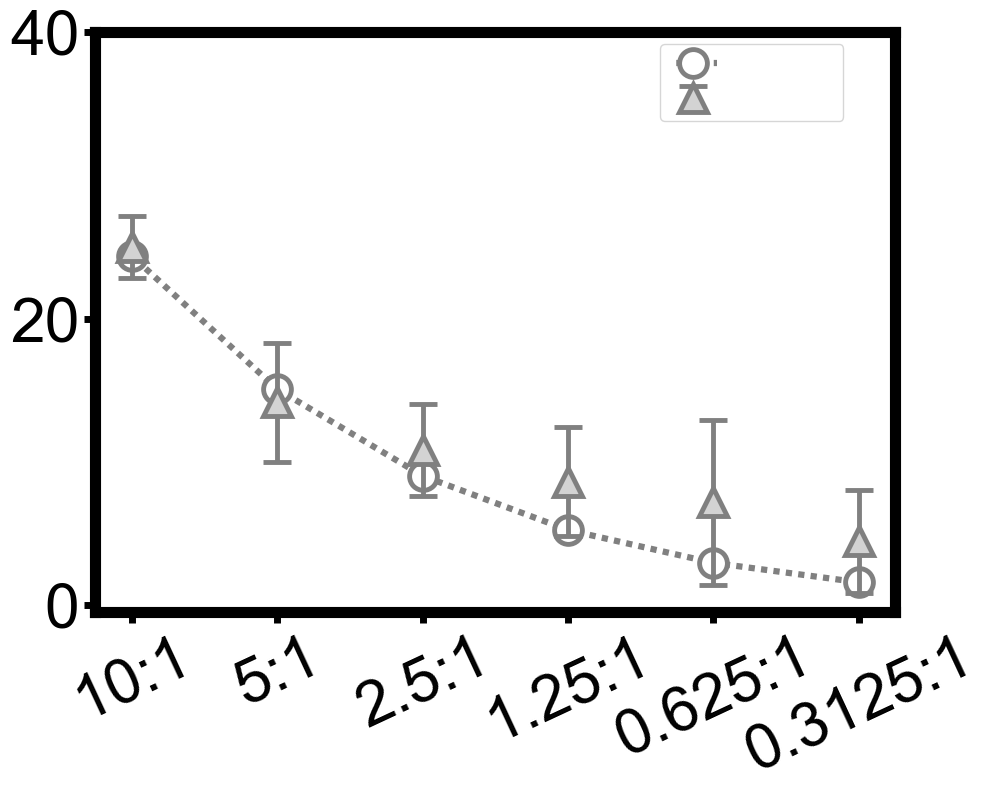

In [18]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
mean_data = [mean_Mono[0]]
std_data = [std_Mono[0]]
plt.plot(ET_ratio_num, res1[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0],label="Fit-WT")
plt.errorbar(ET_ratio_num, mean_data[0], yerr = std_data[0], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([0,20,40],fontname="Arial",fontsize = t_size)
#plt.ylim(0,75)
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.tight_layout(pad=1.0)
plt.savefig('Mono_Wt_fit.png')
plt.show()

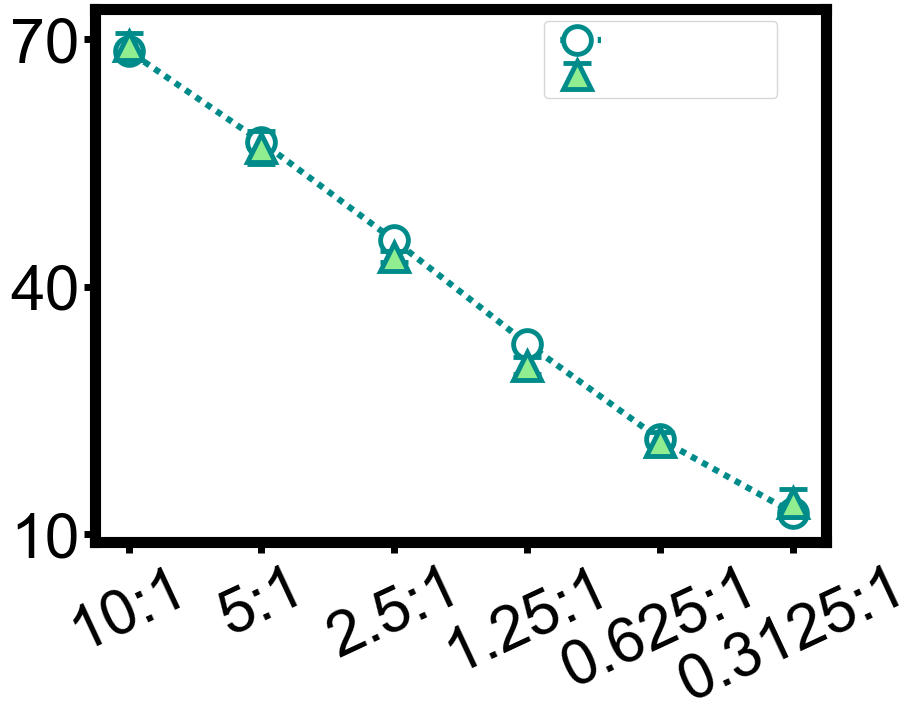

In [31]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
mean_data = [mean_Mono[-1]]
std_data = [std_Mono[-1]]
plt.plot(ET_ratio_num, res1[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0],label="Pred-CAR-NK")
plt.errorbar(ET_ratio_num, mean_data[0], yerr = std_data[0], 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',label="data-CAR-NK")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
#plt.ylim(0,75)
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.tight_layout(pad=1.0)
plt.savefig('Mono_CAR-NK_Pred.png')
plt.show()

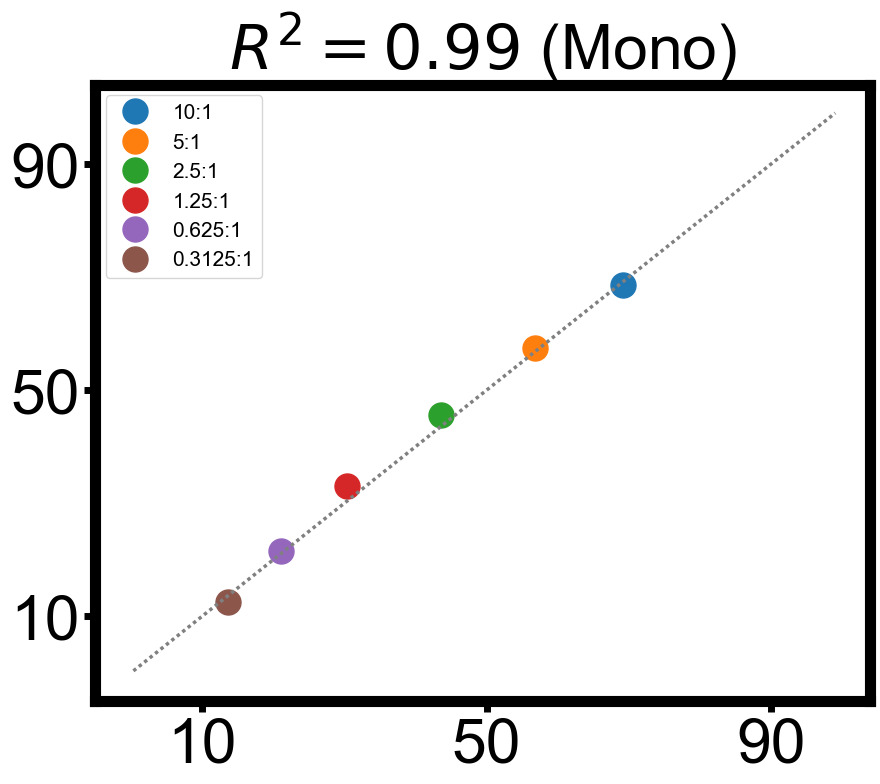

In [32]:
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
plt.rcParams['axes.linewidth'] = 8
#plt.rcParams['font.size'] = 59
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(1,figsize = (10,8))
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
for i in range(len(res1[0])):
    ax.plot(mean_Mono[-1][i], res1[0][i], 'o', markersize=18, label=f'{ET_ratio[i]}')

plt.plot(np.arange(0,100),np.arange(0,100),color='gray',lw=2.5,ls = ls[0])
#plt.xlabel('Data',fontsize =30)
#plt.ylabel('Prediction',fontsize =30)
plt.xticks([10,50,90],fontname="Arial",fontsize = 45)
plt.yticks([10,50,90],fontname="Arial",fontsize = 45)
plt.title(f'$R^2 = {r2_score(mean_Mono[-1], res1[0]):.2f}$ (Mono)',fontsize =45)
plt.legend(prop = {'size':15})
#plt.savefig('R2_Donor1_CAN_NK_Pred.png')
plt.show()

In [19]:
def main_Middle():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 40), (0, 45), (0, 200.0)]]
    Sys_CAR_75.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Monocyte',limts=MFI_limt,frac=param_75[-1],param=param_75[:-1])
    Sys_CAR_50.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Monocyte',limts=MFI_limt,frac=param_50[-1],param=param_50[:-1])
    y0 = copy.deepcopy(res1[2])
    sys = (Sys_CAR_75,Sys_CAR_50)
    data = (mean_Mono[2],mean_Mono[1],ET_ratio)
    return Model_bw_pred(y0,sys,data)
res_Mix_Mono = main_Middle()

Total Cost: 218.63699049642122


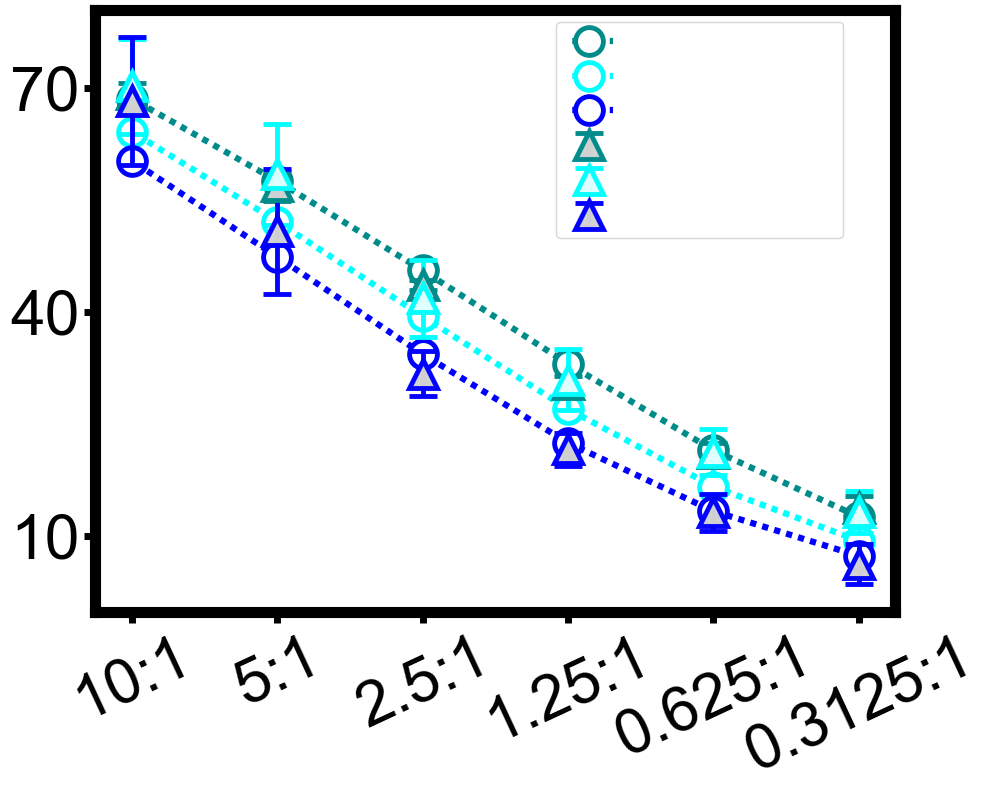

In [20]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5

mean_data = mean_Mono[1:]
std_data = std_Mono[1:]
model_data = [res_Mix_Mono[1],res_Mix_Mono[0],res1[0]]
plt.plot(ET_ratio_num, model_data[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0],label="Pred-CAR-NK-100")
plt.plot(ET_ratio_num, model_data[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='cyan',color = 'cyan',lw=lw,ls = ls[0],label="Pred-CAR-NK-75")
plt.plot(ET_ratio_num, model_data[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0],label="Pred-CAR-NK-50")
plt.errorbar(ET_ratio_num, mean_data[2], yerr = std_data[2], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99,label="data-CAR-NK-100")

plt.errorbar(ET_ratio_num, mean_data[1], yerr = std_data[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightcyan', markeredgewidth=3.5, markeredgecolor='cyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='cyan',alpha=0.99,label="data-CAR-NK-75")


plt.errorbar(ET_ratio_num, mean_data[0], yerr = std_data[0], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99,label="data-CAR-NK-50")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.tight_layout(pad=1.0)
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('Mono_CAR_NK_75_50_Pred.png')
plt.show()

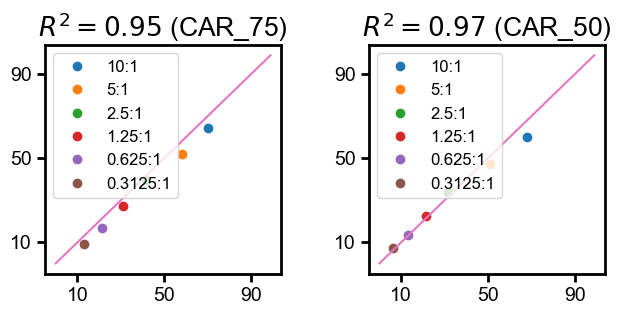

In [35]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'Arial'
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,4))

for i in range(len(res1[0])):
    ax1.plot(mean_Mono[2][i], res_Mix_Mono[0][i], 'o', label=f'{ET_ratio[i]}')
    ax2.plot(mean_Mono[1][i], res_Mix_Mono[1][i], 'o', label=f'{ET_ratio[i]}')

ax1.plot(np.arange(0,100),np.arange(0,100))
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Prediction',fontsize =23)
ax1.set_xticks([10,50,90])
ax1.set_yticks([10,50,90])
ax1.set_title(f'$R^2 = {r2_score(mean_Mono[2], res_Mix_Mono[0]):.2f}$ (CAR_75)',fontsize =19)
ax1.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax1.legend(prop = {'size':12})

ax2.plot(np.arange(0,100),np.arange(0,100))
#ax2.set_xlabel('Data')
#ax2.set_ylabel('Prediction',fontsize =25)
ax2.set_xticks([10,50,90])
ax2.set_yticks([10,50,90])
ax2.set_title(f'$R^2 = {r2_score(mean_Mono[1], res_Mix_Mono[1]):.2f}$ (CAR_50)',fontsize =19)
ax2.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax2.legend(prop = {'size':12})
#plt.xlabel('x')
plt.tight_layout()
plt.savefig('R2_Donor_H_CAN_NK_Pred_Healthy.png')
plt.show()